In [2]:
# HOMEWORK 8: CURVE FITTING AND LINEAR REGRESSION

In [3]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np
import pandas as pd

In [4]:
# 1) Curve Fitting Guided Problem

# (1a)
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
state_temps = df.drop(columns=["AverageTemperatureUncertainty", "Country"])
filtered = state_temps.loc[(state_temps["dt"] >= "2000-01-01") & (state_temps["State"].isin(["Wyoming", "Nebraska", "South Dakota"]))]
filtered

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [5]:
# (1b)

grouped_avgs = filtered.groupby("dt")["AverageTemperature"].mean().reset_index()
grouped_avgs

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


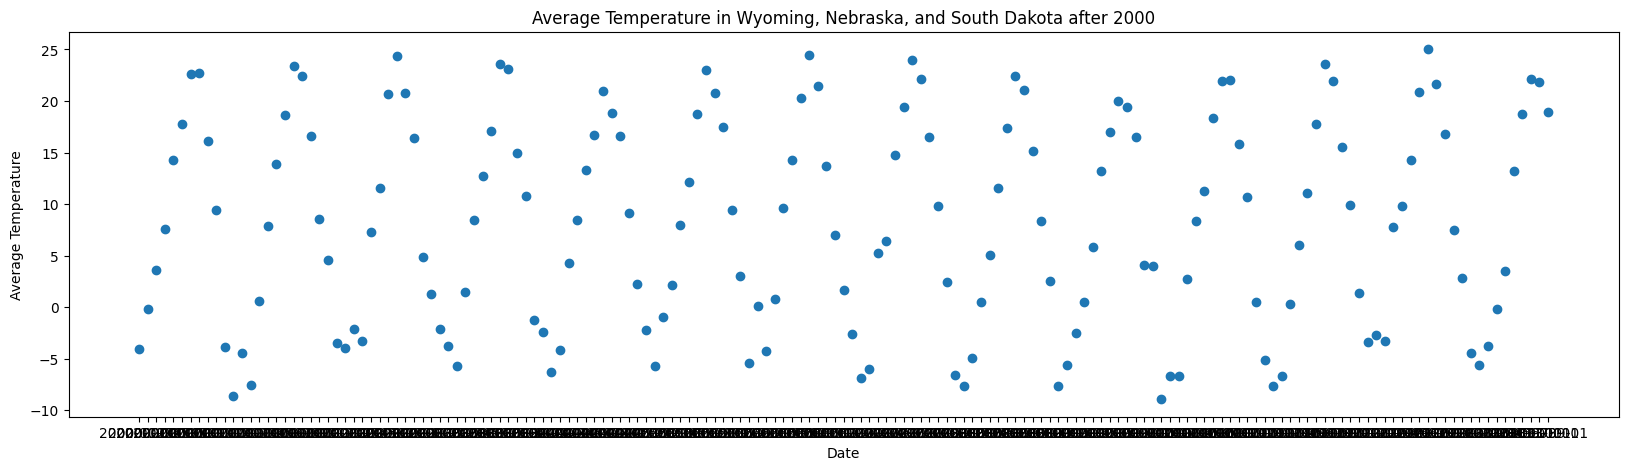

In [6]:
# (1c)

plt.figure(figsize = (20,5))
plt.scatter(grouped_avgs["dt"], grouped_avgs["AverageTemperature"])


plt.title("Average Temperature in Wyoming, Nebraska, and South Dakota after 2000")
plt.xlabel("Date")
plt.ylabel("Average Temperature")

plt.show()

In [7]:
# (1d)

import datetime as date

grouped_avgs["dt"] = pd.to_datetime(grouped_avgs["dt"])

def to_decimal(date):
    return date.year + date.month/12 + date.day/365

grouped_avgs["Decimal Date"] = grouped_avgs["dt"].apply(to_decimal)

grouped_avgs

,dt,AverageTemperature,Decimal Date
0,2000-01-01,-4.072000,2000.086073
1,2000-02-01,-0.205000,2000.169406
2,2000-03-01,3.642667,2000.252740
3,2000-04-01,7.609667,2000.336073
4,2000-05-01,14.255000,2000.419406
...,...,...,...
160,2013-05-01,13.196000,2013.419406
161,2013-06-01,18.783667,2013.502740
162,2013-07-01,22.110333,2013.586073
163,2013-08-01,21.890000,2013.669406


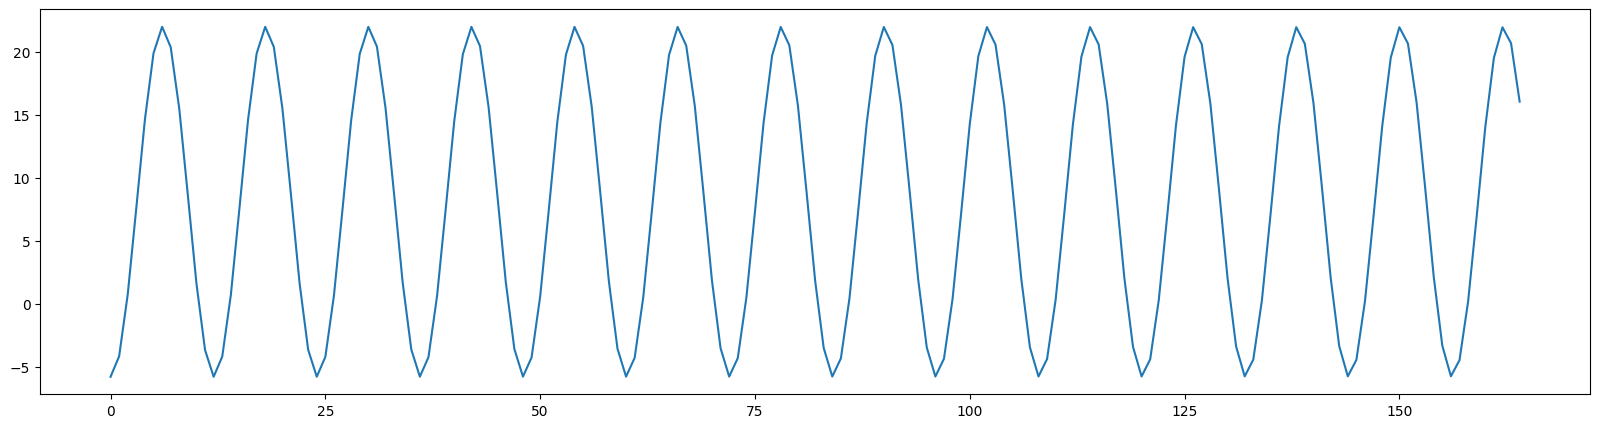

array([-13.89958653,   1.00060704,   8.6209325 ,   8.12295063])

In [8]:
# (1e) and (1f)

def sine(x, a, b, c, d):
    return a*np.sin((2*np.pi/b)*x + c) + d

p0 = [15, 1, 0, 10]

par, cov = fit.curve_fit(sine, grouped_avgs["Decimal Date"], grouped_avgs["AverageTemperature"], p0)

plt.figure(figsize = (20,5))
plt.plot(sine(grouped_avgs["Decimal Date"], par[0], par[1], par[2], par[3]))
plt.show()
par

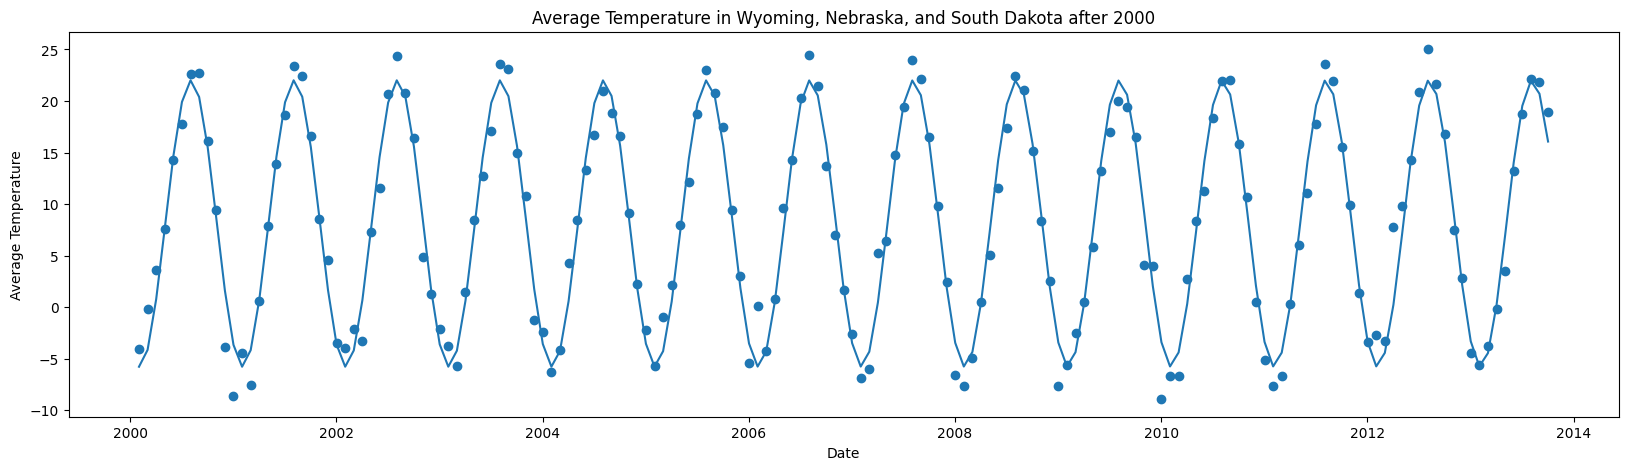

In [9]:
# (1g)


plt.figure(figsize = (20,5))
plt.scatter(grouped_avgs["Decimal Date"], grouped_avgs["AverageTemperature"])
plt.plot(grouped_avgs["Decimal Date"], sine(grouped_avgs["Decimal Date"], par[0], par[1], par[2], par[3]))

plt.title("Average Temperature in Wyoming, Nebraska, and South Dakota after 2000")
plt.xlabel("Date")
plt.ylabel("Average Temperature")

plt.show()

In [10]:
# (1h) and (1i)

errors = np.sqrt([cov[0][0], cov[1][1], cov[2][2], cov[3][3]])
errors

print(f"Amplitude: {par[0]} +/- {errors[0]}\nPeriod: {par[1]} +/- {errors[1]}\nPhase Shift: {par[2]} +/- {errors[2]}\nVertical Shift: {par[3]} +/- {errors[3]}\n")

Amplitude: -13.899586527075616 +/- 0.22636176903378413
Period: 1.0006070448150928 +/- 0.0006626819796669047
Phase Shift: 8.62093250197406 +/- 8.34614576138099
Vertical Shift: 8.122950632537703 +/- 0.1605058930609228



In [16]:
# 2) Random Plotting Practice

rand1 = np.random.randint(0, 200, size = 50)
rand2 = np.random.randint(0, 200, size = 50)
rand3 = np.random.randint(0, 200, size = 50)

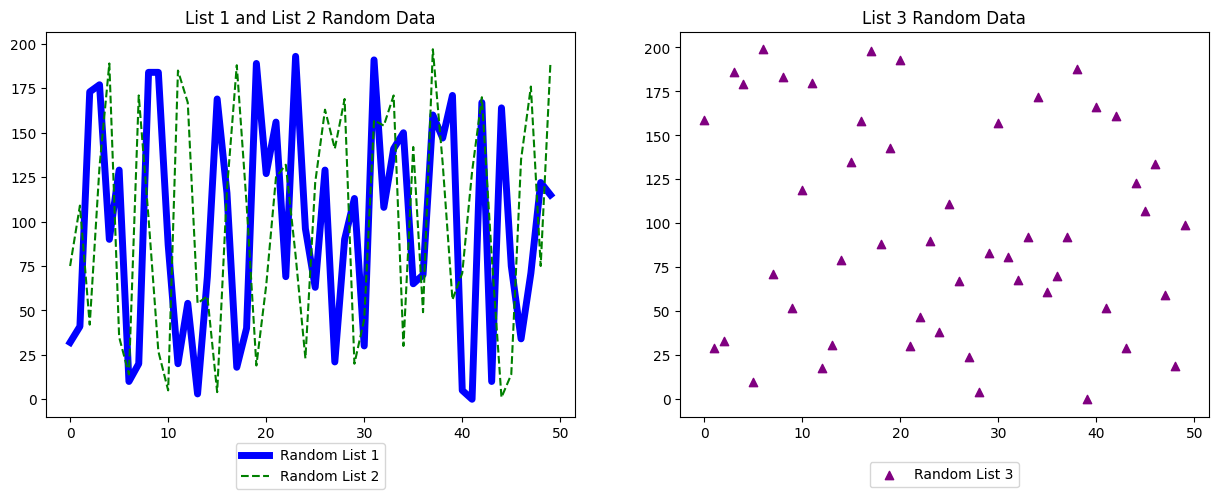

In [53]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(rand1, linewidth = 5, color = "blue", label = "Random List 1")
ax1.plot(rand2, color = "green", ls = "--", label = "Random List 2")
ax1.set_title("List 1 and List 2 Random Data")
ax1.legend(loc = "upper center", bbox_to_anchor=(0.5, -0.05))

ax2.scatter(np.arange(50),rand3, color = "purple", marker = "^", label = "Random List 3")
ax2.set_title("List 3 Random Data")
ax2.legend(loc = "upper center", bbox_to_anchor=(0.5, -0.1))

In [54]:
# 3) Monte Carlo

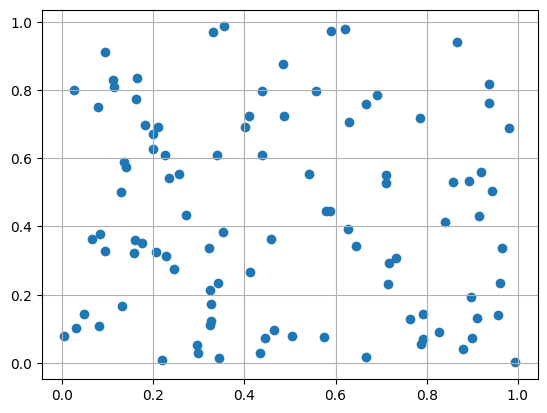

In [61]:
x = np.random.random(size = 100)
y = np.random.random(size = 100)

plt.figure()
plt.scatter(x,y)
plt.grid()

In [64]:
within_one_100 = {}

for i in range(100):
    if (x[i]**2 + y[i]**2) <= 1:
        within_one.update({x[i]: y[i]})
within_one_100

{0.18255642991745358: 0.6962186676945286,
 0.7318368477855385: 0.3062633870343493,
 0.17571992672402248: 0.3509966162881537,
 0.21106990586895757: 0.692008948855136,
 0.6456272686364962: 0.34185320488734594,
 0.06446686463213414: 0.36370680539027544,
 0.048557074386326615: 0.14473779730560488,
 0.0045073503810255655: 0.07991875044593344,
 0.1349056007551086: 0.5900975937706386,
 0.8980718415489941: 0.19267293471954094,
 0.4639896112038351: 0.09731216441974166,
 0.16310918079432823: 0.8360006736886005,
 0.8791904620443977: 0.041669577832183946,
 0.20689336754632404: 0.32632839455966556,
 0.7108350079299907: 0.5498207573293952,
 0.7879173843205496: 0.05510180400417164,
 0.40098644858703525: 0.6915163699747202,
 0.3269122257671502: 0.17359831117099478,
 0.2451919906899961: 0.27543643084631286,
 0.48691404464457044: 0.7243902618447815,
 0.29792780439265365: 0.02809645933199001,
 0.7923302882601839: 0.07031767735001793,
 0.2271630586962632: 0.3147290396593908,
 0.23462140262918252: 0.541461

In [66]:
pi_estimate = len(within_one)/100

In [71]:
# N = 10:
x_10 = np.random.random(size = 10)
y_10 = np.random.random(size = 10)

within_one_10 = {}

for i in range(10):
    if (x_10[i]**2 + y_10[i]**2) <= 1:
        within_one_10.update({x_10[i]: y_10[i]})

pi_estimate_10 = len(within_one_10)/10*4
pi_estimate_10

3.6

In [74]:
# N = 10^3:
x_1000 = np.random.random(size = 1000)
y_1000 = np.random.random(size = 1000)

within_one_1000 = {}

for i in range(1000):
    if (x_1000[i]**2 + y_1000[i]**2) <= 1:
        within_one_1000.update({x_1000[i]: y_1000[i]})

pi_estimate_1000 = len(within_one_1000)/1000*4
pi_estimate_1000

3.16

In [76]:
# N = 10^5: 
x_100000 = np.random.random(size = 100000)
y_100000 = np.random.random(size = 100000)

within_one_100000 = {}

for i in range(100000):
    if (x_100000[i]**2 + y_100000[i]**2) <= 1:
        within_one_100000.update({x_100000[i]: y_100000[i]})

pi_estimate_100000 = len(within_one_100000)/100000*4
pi_estimate_100000

3.14904

In [79]:
# N = 10^6: 
x_1000000 = np.random.random(size = 1000000)
y_1000000 = np.random.random(size = 1000000)

within_one_1000000 = {}

for i in range(1000000):
    if (x_1000000[i]**2 + y_1000000[i]**2) <= 1:
        within_one_1000000.update({x_1000000[i]: y_1000000[i]})

pi_estimate_1000000 = len(within_one_1000000)/1000000*4
pi_estimate_1000000

# As N gets bigger, the estimate of pi gets better

3.143176

In [88]:
# N = 10^4: 
x_10000 = np.random.random(size = 10000)
y_10000 = np.random.random(size = 10000)

inner_points = {}
outer_points = {}   

for i in range(10000):
    if (x_10000[i]**2 + y_10000[i]**2) <= 1:
        inner_points.update({x_10000[i]: y_10000[i]})
    else:
        outer_points.update({x_10000[i]: y_10000[i]})
        
  
pi_estimate_10000 = len(inner_points)/10000*4
pi_estimate_10000

3.174

In [89]:
inner_points

{0.04004861772777668: 0.6496451995870142,
 0.25401459579002084: 0.44752039884859074,
 0.8551566429754476: 0.19382068206761238,
 0.09046011592203596: 0.5126179409752784,
 0.8816617877892966: 0.00382933274920938,
 0.4751202005174904: 0.027171238775360873,
 0.392496229510648: 0.21993159281407537,
 0.10504416332292688: 0.48839059731550816,
 0.14988579810588398: 0.16794483547038008,
 0.35306799531412547: 0.867888914966787,
 0.2767736058829051: 0.44279686868223267,
 0.8023067209171976: 0.11337092448341779,
 0.06503905711881974: 0.1936234745029155,
 0.5987862156864631: 0.2393000205651412,
 0.11320008343425603: 0.8775214892061911,
 0.8953649143335334: 0.03304053049298161,
 0.216794672542321: 0.10363158421867813,
 0.34207427571251403: 0.9298160011666518,
 0.1696321772177175: 0.031160232617435057,
 0.38467038160019107: 0.13758425829716525,
 0.4950981356486084: 0.5795626284911914,
 0.25932823868902977: 0.7383105216340216,
 0.306876427874047: 0.2624603623352372,
 0.5540509739187749: 0.322276709031

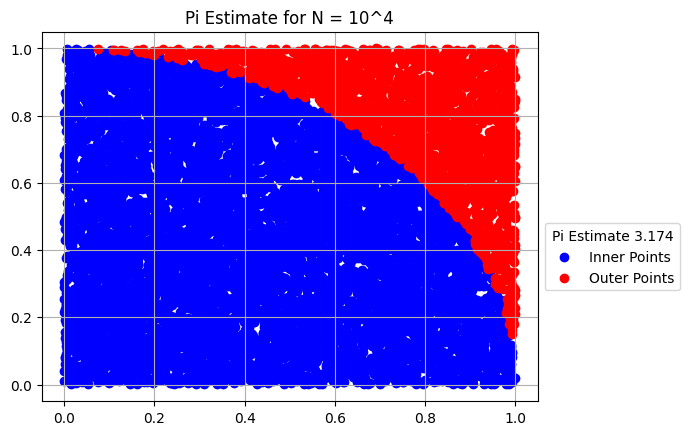

In [125]:



plt.figure()
plt.scatter(list(inner_points.keys()), list(inner_points.values()), color = "blue", label= "Inner Points")
plt.scatter(list(outer_points.keys()), list(outer_points.values()), color = "red", label= "Outer Points")
plt.grid()

plt.title("Pi Estimate for N = 10^4")
plt.legend(title = f"Pi Estimate {pi_estimate_10000}", bbox_to_anchor=(1, 0.5))


